In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 3000, n_features = 10, n_redundant = 0, n_informative = 10, n_clusters_per_class = 1, n_classes = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
models = [('Logistic Regression',LogisticRegression()),('Nearest Neighbors',KNeighborsClassifier()),('Decision Tree',DecisionTreeClassifier()),('Support Vector Classifier',SVC()),('Naive Bayes',GaussianNB())]

In [5]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for model in models:
    model[1].fit(X_train, y_train)
    y_pred = model[1].predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

In [6]:
accuracy_list

[0.8511111111111112,
 0.9288888888888889,
 0.8022222222222222,
 0.94,
 0.7966666666666666]

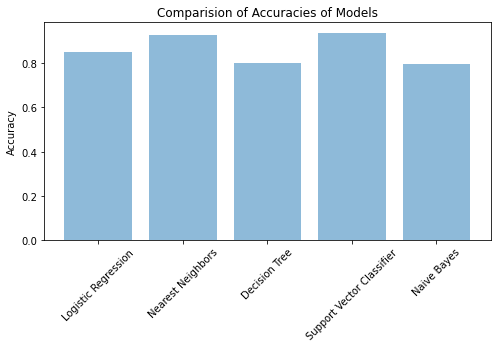

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

In [8]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=models, final_estimator=LogisticRegression(),cv=5)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression', LogisticRegression()),
                               ('Nearest Neighbors', KNeighborsClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Support Vector Classifier', SVC()),
                               ('Naive Bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [9]:
y_pred = stacking_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

ValueError: shape mismatch: objects cannot be broadcast to a single shape

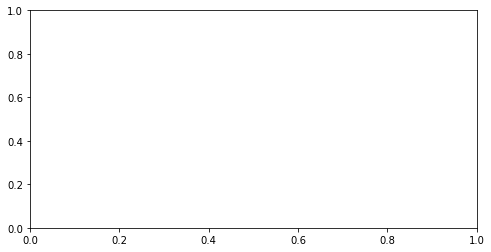

In [11]:
accuracy_list.append(accuracy_score(y_test, y_pred))
model_names = [x[0] for x in models]
model_names.append("Stacked Model")
plt.figure(figsize=(8, 4))
y_pos = range(len(model_names))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()